#### Importing Libraries

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

#### Read Files

In [2]:
oil = pd.read_csv(r"..\Data\01_raw\oil.csv")
holidays = pd.read_csv(r"..\Data\01_raw\holidays_events.csv")
stores = pd.read_csv(r"..\Data\01_raw\stores.csv")
train = pd.read_csv(r"..\Data\01_raw\train.csv")
transactions = pd.read_csv(r"..\Data\01_raw\transactions.csv")

#### Data Profiling

##### 1. Oil data set

In [3]:
oil.shape

(1218, 2)

In [4]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [5]:
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [6]:
def datadefination(df : pd.core.frame.DataFrame):
    c = pd.DataFrame()
    for i in df.columns:
        if df[i].dtype != "O":
            x = df[i].describe().to_frame().T
            x['missing value count'] = df[i].isnull().sum()
            x['null percentage'] = x['missing value count'] / len(df) * 100
            x['column name'] = i
            c = pd.concat([c, x], ignore_index=True)
    
    cols = ['column name'] + [col for col in c.columns if col != 'column name']
    c = c[cols]

    return c

In [7]:
datadefination(oil)

,column name,count,mean,std,min,25%,50%,75%,max,missing value count,null percentage
0,dcoilwtico,1175.0,67.714366,25.630476,26.19,46.405,53.19,95.66,110.62,43,3.530378


##### Testing that the missing values are completly random or the data is missing only if there is a holiday.

In [8]:
null = set(oil[oil['dcoilwtico'].isnull() == True]['date'])
holiday_dates = set(holidays['date'])
null.difference(holiday_dates)

{'2013-01-21',
 '2013-02-18',
 '2013-03-29',
 '2013-05-27',
 '2013-07-04',
 '2013-09-02',
 '2013-11-28',
 '2014-01-20',
 '2014-02-17',
 '2014-05-26',
 '2014-09-01',
 '2014-11-27',
 '2015-01-19',
 '2015-05-25',
 '2015-09-07',
 '2015-11-26',
 '2016-01-18',
 '2016-02-15',
 '2016-05-30',
 '2016-07-04',
 '2016-09-05',
 '2016-11-24',
 '2017-01-16',
 '2017-02-20',
 '2017-05-29',
 '2017-07-04'}

we can treat null values in time series using ffill, bfill and also methods like interpolation. 
interpolation is simply like connecting two dots before and after the null values. and it will not work if the data is missing at the start or end of the data. so we can use forward fill or backward fill accordingly where the data is missing.


In [9]:
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate()

In [10]:
oil.isnull().sum()

date          0
dcoilwtico    1
dtype: int64

In [11]:
oil.bfill(inplace=True)

In [12]:
oil

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [13]:
oil.isna().sum()

date          0
dcoilwtico    0
dtype: int64

In [14]:
x = list(oil['date'].astype(str))

y = []
for i in x:
    y.append(i[:4])
oil['year'] = y
oil

,date,dcoilwtico,year
0,2013-01-01,93.14,2013
1,2013-01-02,93.14,2013
2,2013-01-03,92.97,2013
3,2013-01-04,93.12,2013
4,2013-01-07,93.20,2013
...,...,...,...
1213,2017-08-25,47.65,2017
1214,2017-08-28,46.40,2017
1215,2017-08-29,46.46,2017
1216,2017-08-30,45.96,2017


<Axes: xlabel='year', ylabel='dcoilwtico'>

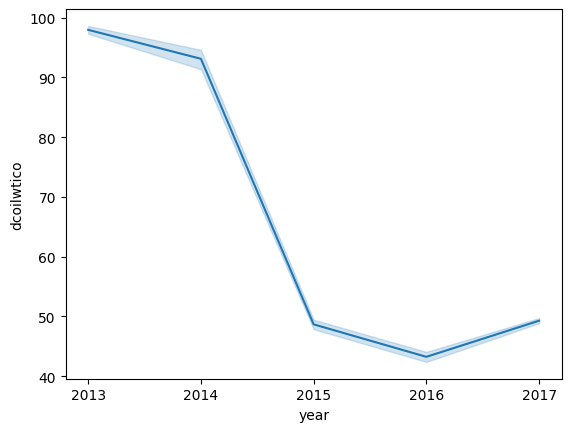

In [15]:
sns.lineplot(data=oil,x="year",y="dcoilwtico")

2. Holidays dataset

In [16]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [17]:
holidays.shape

(350, 6)

In [18]:
holidays['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [19]:
holidays[holidays['date'] == "2012-12-25"]

,date,type,locale,locale_name,description,transferred
37,2012-12-25,Holiday,National,Ecuador,Navidad,False


In [20]:
holidays[holidays['type'] == "Transfer"]

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


Additional means if 25th december is celebrated as chritmas and the some days before it all considered as the christmas holidays 
25th - holiday
other days - additional.

In [21]:
holidays[holidays['type'] == "Additional"]

,date,type,locale,locale_name,description,transferred
28,2012-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
31,2012-12-21,Additional,National,Ecuador,Navidad-4,False
33,2012-12-22,Additional,National,Ecuador,Navidad-3,False
34,2012-12-23,Additional,National,Ecuador,Navidad-2,False
36,2012-12-24,Additional,National,Ecuador,Navidad-1,False
38,2012-12-26,Additional,National,Ecuador,Navidad+1,False
40,2012-12-31,Additional,National,Ecuador,Primer dia del ano-1,False
53,2013-05-11,Additional,National,Ecuador,Dia de la Madre-1,False
64,2013-07-24,Additional,Local,Guayaquil,Fundacion de Guayaquil-1,False
81,2013-12-05,Additional,Local,Quito,Fundacion de Quito-1,False


Bridge is like a if give that day as a holiday then it will be a long weekend or something 
example : 23th dec is sunday and 25th is christmas then 24th is the bridge between 2 holidays.

In [22]:
holidays[holidays['type'] == "Bridge"]

,date,type,locale,locale_name,description,transferred
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
39,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False
156,2014-12-26,Bridge,National,Ecuador,Puente Navidad,False
160,2015-01-02,Bridge,National,Ecuador,Puente Primer dia del ano,False
277,2016-11-04,Bridge,National,Ecuador,Puente Dia de Difuntos,False


The type "work day" means it is actually a working day and if any public holiday comes on any weekend like sat or sun then one day is given as the observed day to celebrate that holiday.

In [23]:
holidays[holidays['type'] == "Work Day"]

,date,type,locale,locale_name,description,transferred
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False
161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False
283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


"Event" refers to there is a some kind of situation occured or that there is an event is going on like 
on april 16th 2016 earth quake has occured , nov 11th 2018 was celebrated as cyber monday.

In [24]:
holidays[holidays['type'] == "Event"]

,date,type,locale,locale_name,description,transferred
55,2013-05-12,Event,National,Ecuador,Dia de la Madre,False
103,2014-05-11,Event,National,Ecuador,Dia de la Madre,False
106,2014-06-12,Event,National,Ecuador,Inauguracion Mundial de futbol Brasil,False
107,2014-06-15,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Suiza,False
108,2014-06-20,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Honduras,False
113,2014-06-25,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Francia,False
114,2014-06-28,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False
115,2014-06-29,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False
116,2014-06-30,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False
117,2014-07-01,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False


In [25]:
holidays.groupby(['type'])['locale'].count()

type
Additional     51
Bridge          5
Event          56
Holiday       221
Transfer       12
Work Day        5
Name: locale, dtype: int64

as the holiday data indicates there are no numerical variables where we want to describe and also there are no null values present in this dataset. we think that this dataset is clean.

3. stores

In [26]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [27]:
stores['type'].unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

In [28]:
x = stores['cluster'].unique()
x.sort()
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [29]:
stores['state'].unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [30]:
stores[['city','state']].drop_duplicates().sort_values('state')

,city,state
36,Cuenca,Azuay
18,Guaranda,Bolivar
13,Riobamba,Chimborazo
11,Latacunga,Cotopaxi
39,Machala,El Oro
42,Esmeraldas,Esmeraldas
34,Playas,Guayas
35,Libertad,Guayas
23,Guayaquil,Guayas
26,Daule,Guayas


In [31]:
stores[['city','state']].drop_duplicates().sort_values('state').shape

(22, 2)

overall the stores are present in 22 different cities across all the states

In [32]:
stores.groupby(['state'])['city'].unique()

state
Azuay                                                         [Cuenca]
Bolivar                                                     [Guaranda]
Chimborazo                                                  [Riobamba]
Cotopaxi                                                   [Latacunga]
El Oro                                                       [Machala]
Esmeraldas                                                [Esmeraldas]
Guayas                            [Guayaquil, Daule, Playas, Libertad]
Imbabura                                                      [Ibarra]
Loja                                                            [Loja]
Los Rios                                           [Babahoyo, Quevedo]
Manabi                                              [Manta, El Carmen]
Pastaza                                                         [Puyo]
Pichincha                                             [Quito, Cayambe]
Santa Elena                                                  [Salinas]


for each type number stores

<Axes: xlabel='type', ylabel='store_nbr'>

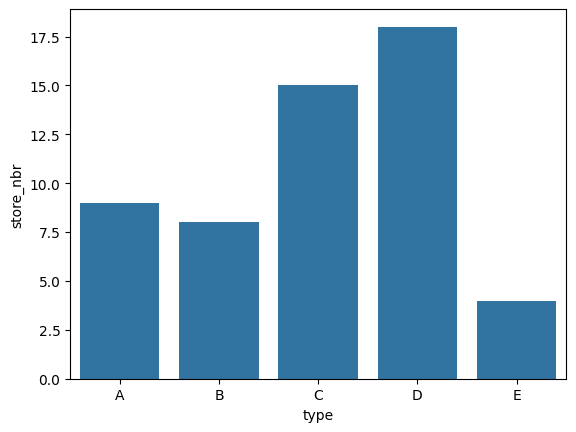

In [33]:
each_type = stores.groupby(['type'])['store_nbr'].count().reset_index()
sns.barplot(data = each_type , x = 'type',y = 'store_nbr')

how many stores for each cluster

<Axes: xlabel='cluster', ylabel='store_nbr'>

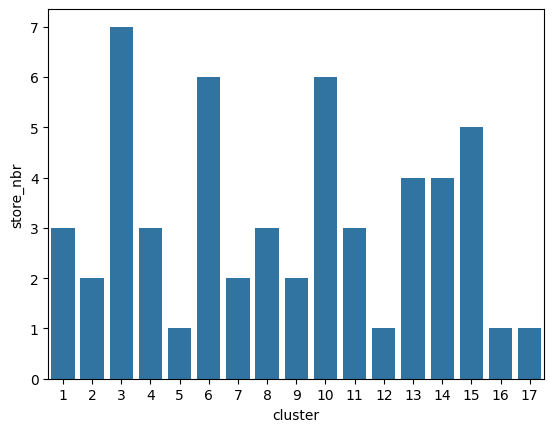

In [34]:
each_cluster = stores.groupby(['cluster'])['store_nbr'].count().reset_index()
sns.barplot(data = each_cluster, x = 'cluster',y = 'store_nbr')

In [35]:
cluster = list(stores['cluster'].unique())
cluster.sort()

for i in cluster:
    x = stores[stores['cluster'] == i]
    x = pd.DataFrame(x)
    display(x)


,store_nbr,city,state,type,cluster
23,24,Guayaquil,Guayas,D,1
24,25,Salinas,Santa Elena,D,1
26,27,Daule,Guayas,D,1


,store_nbr,city,state,type,cluster
36,37,Cuenca,Azuay,D,2
41,42,Cuenca,Azuay,D,2


,store_nbr,city,state,type,cluster
15,16,Santo Domingo,Santo Domingo de los Tsachilas,C,3
29,30,Guayaquil,Guayas,C,3
31,32,Guayaquil,Guayas,C,3
32,33,Quevedo,Los Rios,C,3
34,35,Playas,Guayas,C,3
39,40,Machala,El Oro,C,3
53,54,El Carmen,Manabi,C,3


,store_nbr,city,state,type,cluster
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
37,38,Loja,Loja,D,4
40,41,Machala,El Oro,D,4


,store_nbr,city,state,type,cluster
43,44,Quito,Pichincha,A,5


,store_nbr,city,state,type,cluster
8,9,Quito,Pichincha,B,6
10,11,Cayambe,Pichincha,B,6
19,20,Quito,Pichincha,B,6
20,21,Santo Domingo,Santo Domingo de los Tsachilas,B,6
33,34,Guayaquil,Guayas,B,6
38,39,Cuenca,Azuay,B,6


,store_nbr,city,state,type,cluster
13,14,Riobamba,Chimborazo,C,7
21,22,Puyo,Pastaza,C,7


,store_nbr,city,state,type,cluster
2,3,Quito,Pichincha,D,8
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8


,store_nbr,city,state,type,cluster
3,4,Quito,Pichincha,D,9
22,23,Ambato,Tungurahua,D,9


,store_nbr,city,state,type,cluster
25,26,Guayaquil,Guayas,D,10
27,28,Guayaquil,Guayas,E,10
28,29,Guayaquil,Guayas,E,10
30,31,Babahoyo,Los Rios,B,10
35,36,Libertad,Guayas,E,10
42,43,Esmeraldas,Esmeraldas,E,10


,store_nbr,city,state,type,cluster
44,45,Quito,Pichincha,A,11
48,49,Quito,Pichincha,A,11
51,52,Manta,Manabi,A,11


,store_nbr,city,state,type,cluster
16,17,Quito,Pichincha,C,12


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
5,6,Quito,Pichincha,D,13
52,53,Manta,Manabi,D,13


,store_nbr,city,state,type,cluster
45,46,Quito,Pichincha,A,14
46,47,Quito,Pichincha,A,14
47,48,Quito,Pichincha,A,14
49,50,Ambato,Tungurahua,A,14


,store_nbr,city,state,type,cluster
9,10,Quito,Pichincha,C,15
11,12,Latacunga,Cotopaxi,C,15
12,13,Latacunga,Cotopaxi,C,15
14,15,Ibarra,Imbabura,C,15
18,19,Guaranda,Bolivar,C,15


,store_nbr,city,state,type,cluster
17,18,Quito,Pichincha,B,16


,store_nbr,city,state,type,cluster
50,51,Guayaquil,Guayas,A,17


number of stores in each state

In [36]:
stores.groupby(['state'])['store_nbr'].count().reset_index()

,state,store_nbr
0,Azuay,3
1,Bolivar,1
2,Chimborazo,1
3,Cotopaxi,2
4,El Oro,2
5,Esmeraldas,1
6,Guayas,11
7,Imbabura,1
8,Loja,1
9,Los Rios,2


C:\Users\User4yy3\AppData\Local\Temp\ipykernel_10180\2948783093.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Azuay'),
 Text(1, 0, 'Bolivar'),
 Text(2, 0, 'Chimborazo'),
 Text(3, 0, 'Cotopaxi'),
 Text(4, 0, 'El Oro'),
 Text(5, 0, 'Esmeraldas'),
 Text(6, 0, 'Guayas'),
 Text(7, 0, 'Imbabura'),
 Text(8, 0, 'Loja'),
 Text(9, 0, 'Los Rios'),
 Text(10, 0, 'Manabi'),
 Text(11, 0, 'Pastaza'),
 Text(12, 0, 'Pichincha'),
 Text(13, 0, 'Santa Elena'),
 Text(14, 0, 'Santo Domingo de los Tsachilas'),
 Text(15, 0, 'Tungurahua')]

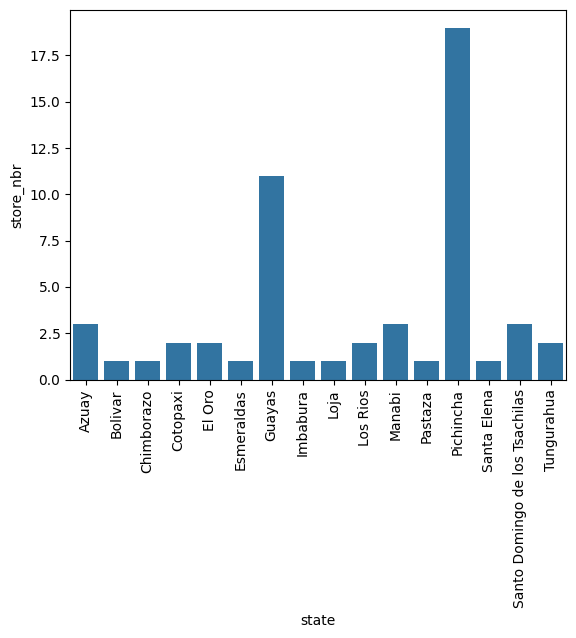

In [37]:
each_state = stores.groupby(['state'])['store_nbr'].count().reset_index()
my_plot  = sns.barplot(data = each_state, x = 'state',y = 'store_nbr')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

we have more stores in the state pinchinacha

number of stores per city

In [38]:
stores.groupby(['city'])['store_nbr'].count().reset_index()

,city,store_nbr
0,Ambato,2
1,Babahoyo,1
2,Cayambe,1
3,Cuenca,3
4,Daule,1
5,El Carmen,1
6,Esmeraldas,1
7,Guaranda,1
8,Guayaquil,8
9,Ibarra,1


There are more stores in captical city of the ecuador and Guayaquil is a tourist destination.

C:\Users\User4yy3\AppData\Local\Temp\ipykernel_10180\3480373165.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Ambato'),
 Text(1, 0, 'Babahoyo'),
 Text(2, 0, 'Cayambe'),
 Text(3, 0, 'Cuenca'),
 Text(4, 0, 'Daule'),
 Text(5, 0, 'El Carmen'),
 Text(6, 0, 'Esmeraldas'),
 Text(7, 0, 'Guaranda'),
 Text(8, 0, 'Guayaquil'),
 Text(9, 0, 'Ibarra'),
 Text(10, 0, 'Latacunga'),
 Text(11, 0, 'Libertad'),
 Text(12, 0, 'Loja'),
 Text(13, 0, 'Machala'),
 Text(14, 0, 'Manta'),
 Text(15, 0, 'Playas'),
 Text(16, 0, 'Puyo'),
 Text(17, 0, 'Quevedo'),
 Text(18, 0, 'Quito'),
 Text(19, 0, 'Riobamba'),
 Text(20, 0, 'Salinas'),
 Text(21, 0, 'Santo Domingo')]

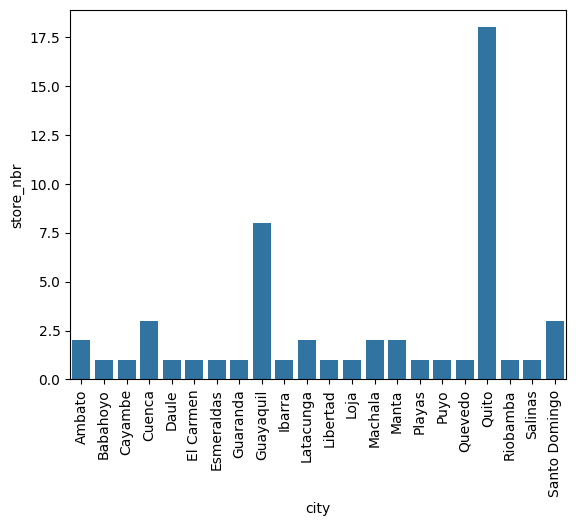

In [39]:
each_state = stores.groupby(['city'])['store_nbr'].count().reset_index()
my_plot  = sns.barplot(data = each_state, x = 'city',y = 'store_nbr')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

when were the stores opened according to the data present.

In [40]:
x = list(transactions['date'].astype(str))
y = []
for i in x:
    y.append(i[:4])
transactions['year'] = y

In [41]:
store_ids = {i for i in range(1,55)}
filtered = set(transactions[transactions['year'] == '2013']['store_nbr'])
store_ids-filtered

{20, 21, 22, 29, 42, 52, 53}

<Axes: xlabel='year', ylabel='store_count'>

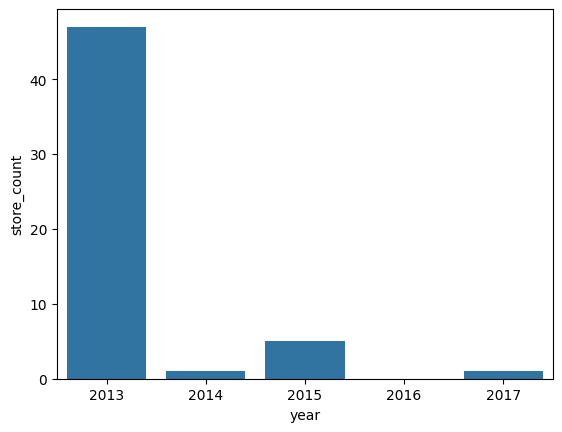

In [42]:
store_ids = {i for i in range(1,55)}
years = list( transactions['year'].unique())
store_count = []
for i in years:
    filtered = set(transactions[transactions['year'] == i]['store_nbr'])
    store_count.append(len(store_ids)-len(store_ids-filtered))
    store_ids = store_ids-filtered
opened_stores = {"year":years,"store_count":store_count}
opened_stores = pd.DataFrame(opened_stores)
sns.barplot(data = opened_stores,x = 'year', y = 'store_count')


In [43]:
opened_stores

,year,store_count
0,2013,47
1,2014,1
2,2015,5
3,2016,0
4,2017,1


4. Train dataset

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [45]:
datadefination(train)

,column name,count,mean,std,min,25%,50%,75%,max,missing value count,null percentage
0,id,3000888.0,1.500444e+06,866281.891642,0.0,750221.75,1500443.5,2.250665e+06,3000887.0,0,0.0
1,store_nbr,3000888.0,2.750000e+01,15.585787,1.0,14.00,27.5,4.100000e+01,54.0,0,0.0
2,sales,3000888.0,3.577757e+02,1101.997721,0.0,0.00,11.0,1.958473e+02,124717.0,0,0.0
3,onpromotion,3000888.0,2.602770e+00,12.218882,0.0,0.00,0.0,0.000000e+00,741.0,0,0.0


In [46]:
train['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [47]:
train['onpromotion'].unique()

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
       125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
       151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
       162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
       177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
       196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
       185, 139, 143,  80, 124,  71, 134, 193,  78,  88, 122, 13

<Axes: xlabel='store_nbr', ylabel='sales'>

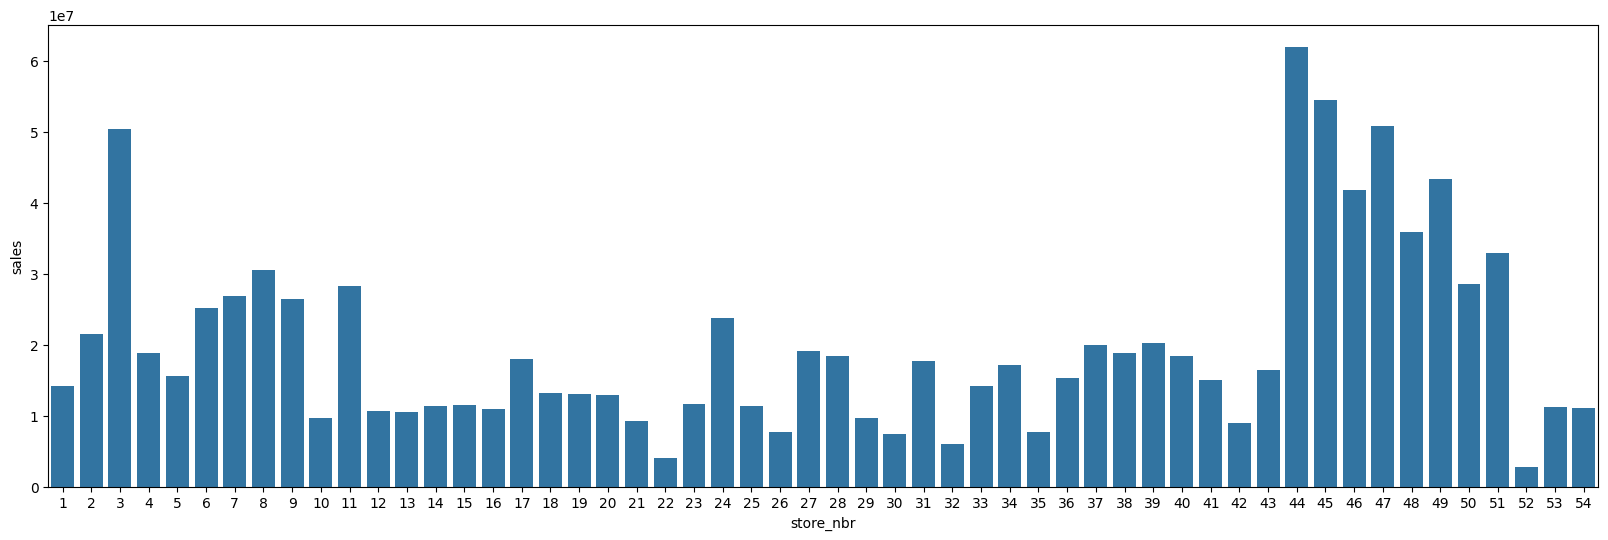

In [48]:
import matplotlib.pyplot as plt
total_sales = train.groupby(['store_nbr'])['sales'].sum().to_frame().reset_index().sort_values('sales')
plt.figure(figsize=(20,6))
sns.barplot(data = total_sales,x = 'store_nbr',y='sales')

In [49]:
train['date'] = pd.to_datetime(train['date'])
train['date'].dtype

dtype('<M8[ns]')

In [50]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.strftime('%b').str.lower()


In [51]:
year_2015 = train[train['year'] == 2015]
month_jun = year_2015[year_2015['month'] == "jun"]
month_jun.sort_values(['sales'],ascending=False)

,id,date,store_nbr,family,sales,onpromotion,year,month
1578402,1578402,2015-06-07,46,GROCERY I,16269.000,14,2015,jun
1601520,1601520,2015-06-20,44,PRODUCE,15560.965,1,2015,jun
1578369,1578369,2015-06-07,45,GROCERY I,15365.000,11,2015,jun
1578468,1578468,2015-06-07,48,GROCERY I,15341.000,21,2015,jun
1615749,1615749,2015-06-28,44,BEVERAGES,15283.000,2,2015,jun
...,...,...,...,...,...,...,...,...
1566679,1566679,2015-06-01,18,BOOKS,0.000,0,2015,jun
1566626,1566626,2015-06-01,16,HOME APPLIANCES,0.000,0,2015,jun
1566628,1566628,2015-06-01,16,LADIESWEAR,0.000,0,2015,jun
1566629,1566629,2015-06-01,16,LAWN AND GARDEN,0.000,0,2015,jun


In [52]:
year_2015 = train[train['year'] == 2014]
month_jun = year_2015[year_2015['month'] == "jun"]
month_jun.sort_values(['sales'],ascending=False)

,id,date,store_nbr,family,sales,onpromotion,year,month
958200,958200,2014-06-23,44,GROCERY I,18016.0,0,2014,jun
919128,919128,2014-06-01,48,GROCERY I,16318.0,0,2014,jun
918996,918996,2014-06-01,44,GROCERY I,16143.0,0,2014,jun
919029,919029,2014-06-01,45,GROCERY I,16128.0,0,2014,jun
919062,919062,2014-06-01,46,GROCERY I,15536.0,0,2014,jun
...,...,...,...,...,...,...,...,...
944215,944215,2014-06-15,51,LADIESWEAR,0.0,0,2014,jun
944218,944218,2014-06-15,51,"LIQUOR,WINE,BEER",0.0,0,2014,jun
971187,971187,2014-06-30,9,PRODUCE,0.0,0,2014,jun
971188,971188,2014-06-30,9,SCHOOL AND OFFICE SUPPLIES,0.0,0,2014,jun


In [53]:
train['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

sales per each month in each year.

C:\Users\User4yy3\AppData\Local\Temp\ipykernel_10180\3730293762.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\User4yy3\AppData\Local\Temp\ipykernel_10180\3730293762.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\User4yy3\AppData\Local\Temp\ipykernel_10180\3730293762.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\User4yy3\AppData\Local\Temp\ipykernel_10180\3730293762.py:10: Fu

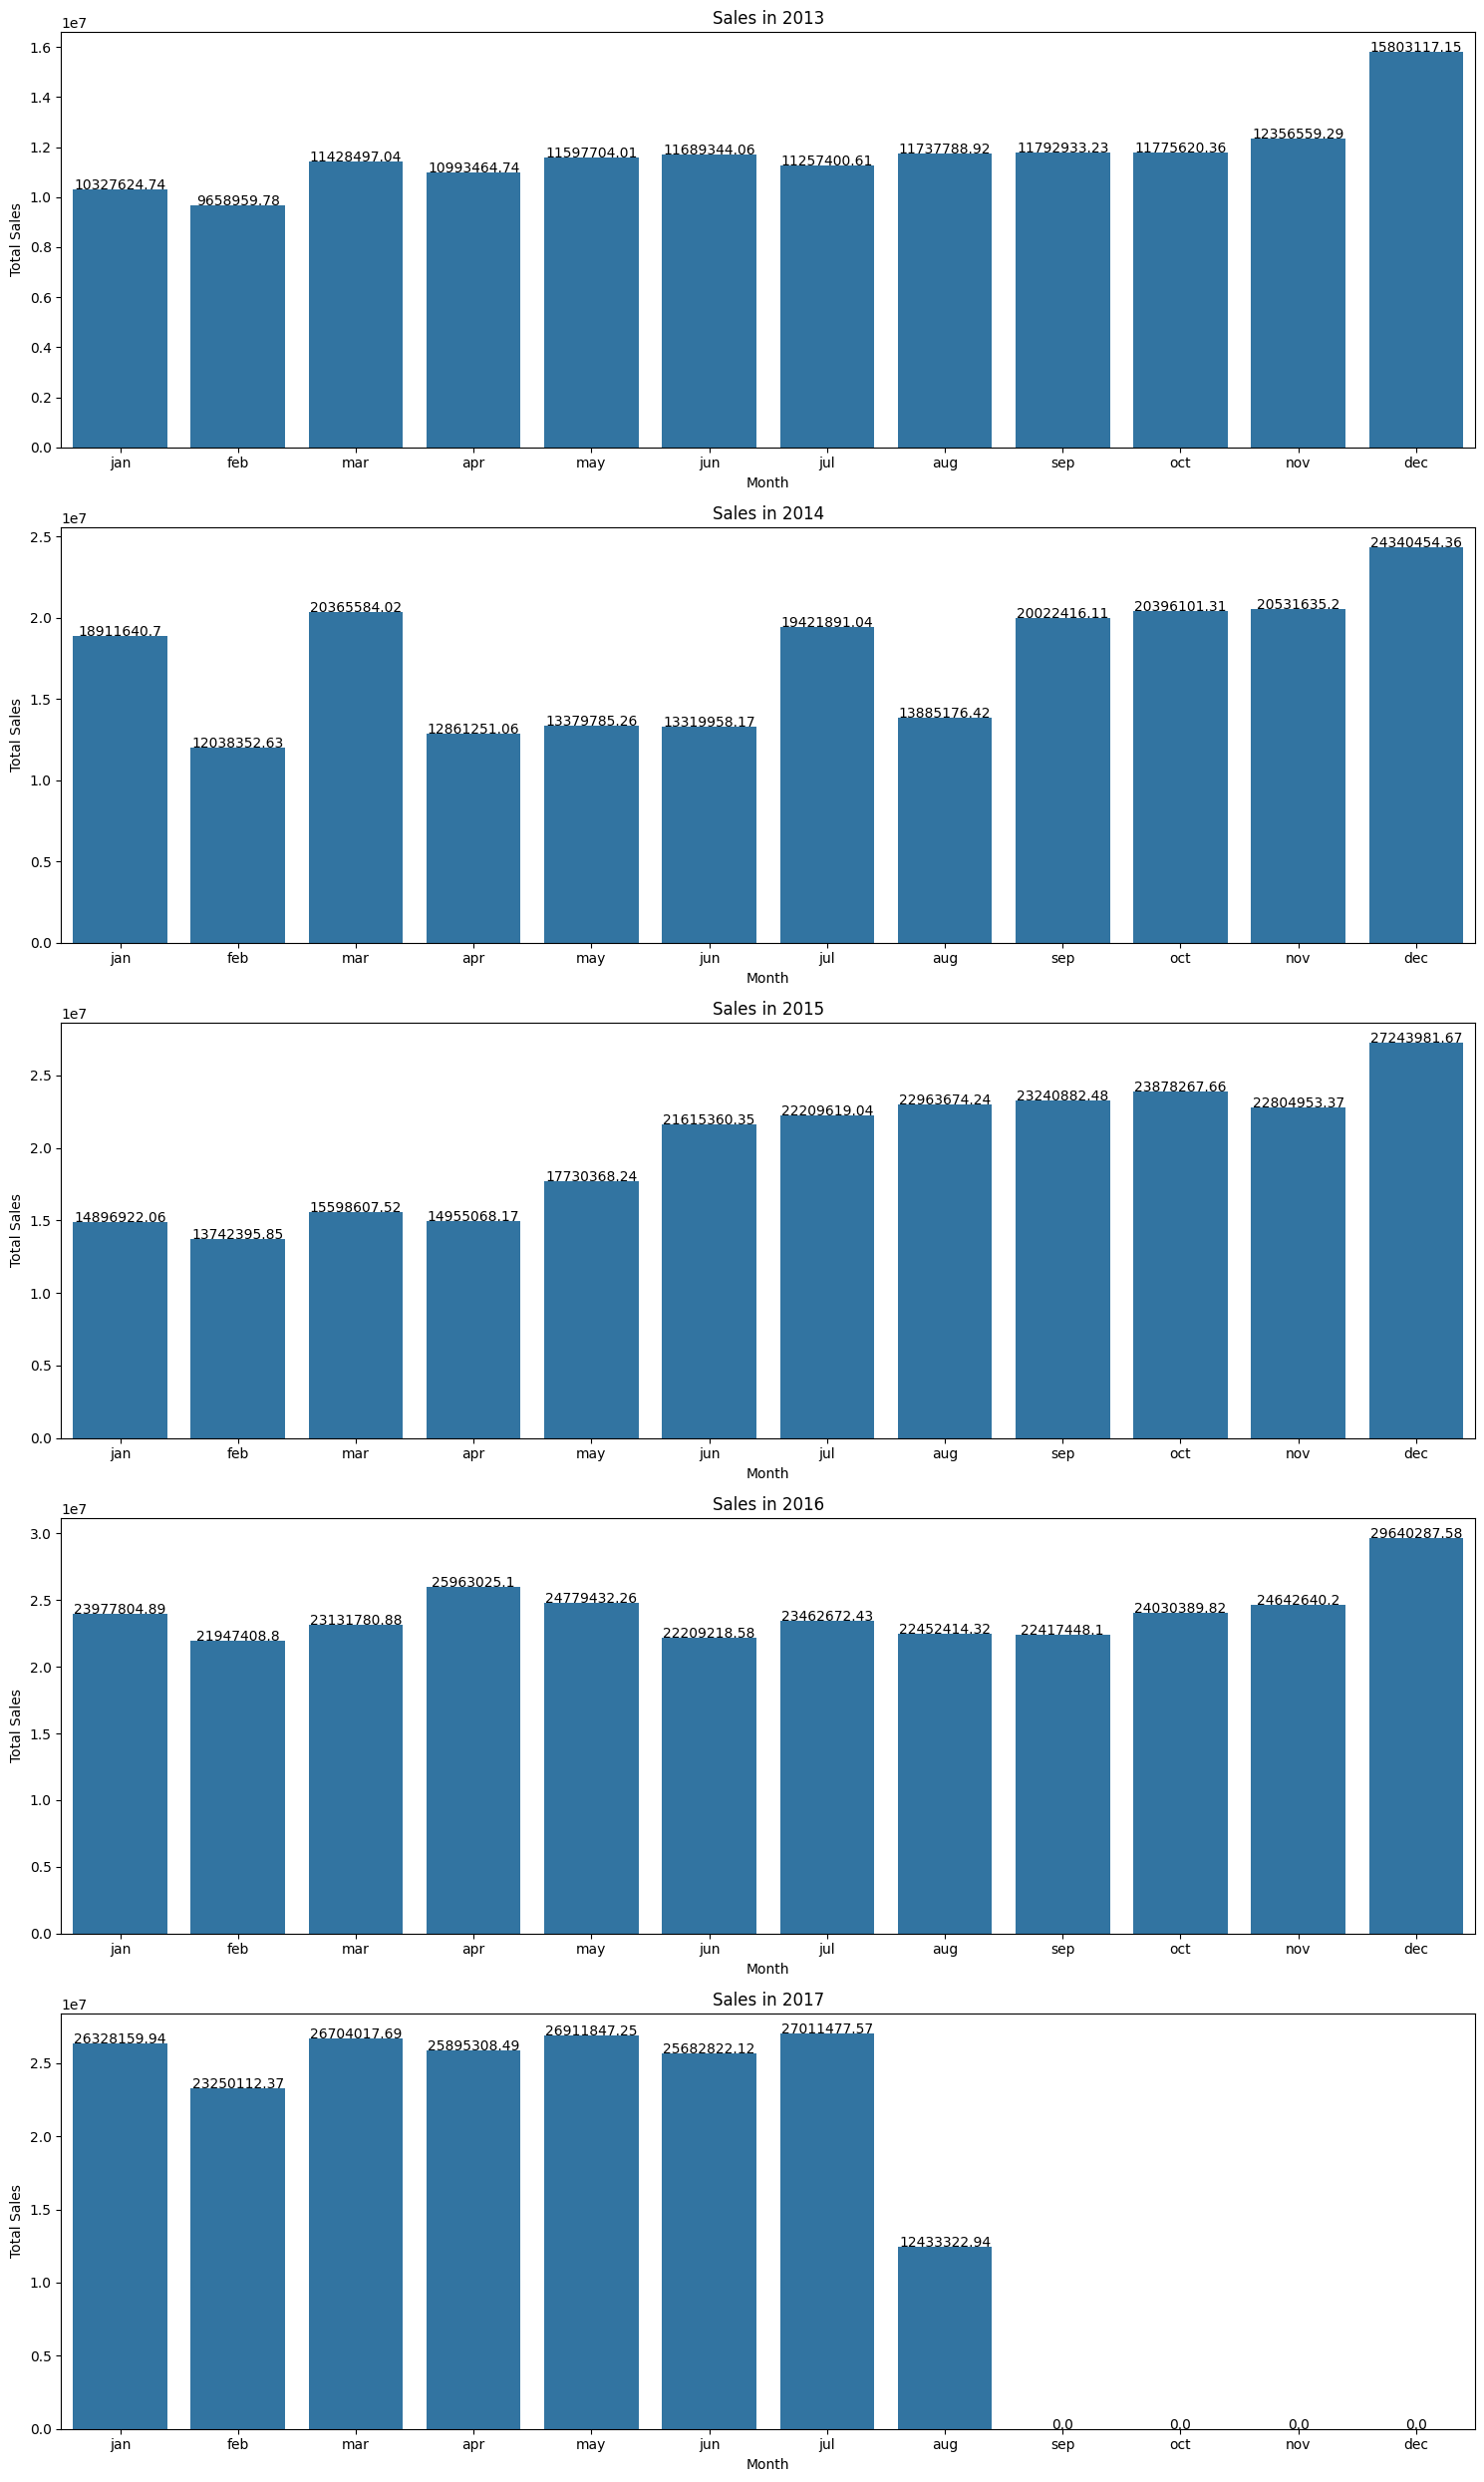

In [111]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
train['month'] = pd.Categorical(train['month'], categories=month_order, ordered=True)
years = list(train['year'].unique())
n_years = len(years)
fig, axes = plt.subplots(n_years, 1, figsize=(15, 5 * n_years))
if n_years == 1:
    axes = [axes]
for i, year in enumerate(years):
    each_year = train[train['year'] == year]
    each_year = each_year.groupby('month')['sales'].sum().reset_index()
    
    sns.barplot(data=each_year, x='month', y='sales', ax=axes[i])
    axes[i].set_title(f'Sales in {year}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Total Sales')
    for index, row in each_year.iterrows():
        axes[i].text(index, row['sales'], round(row['sales'], 2), color='black', ha="center")
# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='promotions', ylabel='total_sales'>

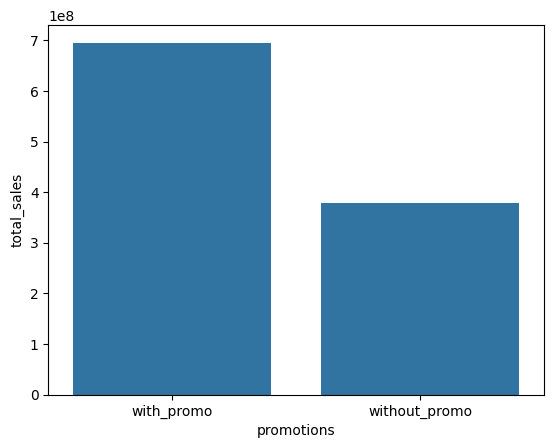

In [92]:
count_promo = train[train['onpromotion'] != 0]['sales'].sum()
count_without_promo = train[train['onpromotion'] == 0]['sales'].sum()
data_frame = {"promotions":['with_promo','without_promo'],"total_sales":[count_promo,count_without_promo]}
data_frame = pd.DataFrame(data_frame)
sns.barplot(data = data_frame,x = 'promotions',y = 'total_sales')

In [110]:
product_count_promo = train[train['onpromotion'] != 0].groupby(['family'])['sales'].mean().to_frame().reset_index()
product_count_without_promo = train[train['onpromotion'] == 0].groupby(['family'])['sales'].mean().to_frame().reset_index()
# data_frame = {"promotions":['with_promo','without_promo'],"total_sales":[count_promo,count_without_promo]}
# data_frame = pd.DataFrame(data_frame)
# sns.barplot(data = data_frame,x = 'promotions',y = 'total_sales')
product_count_promo.rename(columns={'sales':"sales_with_promo"},inplace=True)
product_count_without_promo.rename(columns={'sales':"sales_without_promo"},inplace=True)
promo = product_count_promo.merge(product_count_without_promo,how='outer',on='family')
promo

# plt.figure(figsize=(20,15))

# sns.barplot(data = promo, x = 'family', y = 'sales_with_promo', color = 'red')
# sns.barplot(data = promo, x = 'family', y = 'sales_without_promo', color = 'brown')

# plt.xticks(rotation = 90)
# plt.show()

,family,sales_with_promo,sales_without_promo
0,AUTOMOTIVE,13.241978,5.853087
1,BABY CARE,1.660377,0.109624
2,BEAUTY,8.291266,3.078452
3,BEVERAGES,3215.498308,1292.272591
4,BOOKS,NaN,0.070797
5,BREAD/BAKERY,575.485296,379.513249
6,CELEBRATION,19.969168,7.945922
7,CLEANING,1240.210741,868.378326
8,DAIRY,933.341720,479.811128
9,DELI,321.665801,221.763382


5. Transactions dataset

In [55]:
datadefination(transactions)

,column name,count,mean,std,min,25%,50%,75%,max,missing value count,null percentage
0,store_nbr,83488.0,26.939237,15.608204,1.0,13.0,27.0,40.0,54.0,0,0.0
1,transactions,83488.0,1694.602158,963.286644,5.0,1046.0,1393.0,2079.0,8359.0,0,0.0


In [56]:
transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
year            0
dtype: int64

In [57]:
transactions['date'] = pd.to_datetime(transactions['date'])
transactions['date'].dtype

dtype('<M8[ns]')

Total number of transactions in each year.

In [58]:
transactions.groupby(['year'])['transactions'].sum()

year
2013    29107173
2014    30006929
2015    31312370
2016    31052337
2017    20000136
Name: transactions, dtype: int64

<Axes: xlabel='year', ylabel='transactions'>

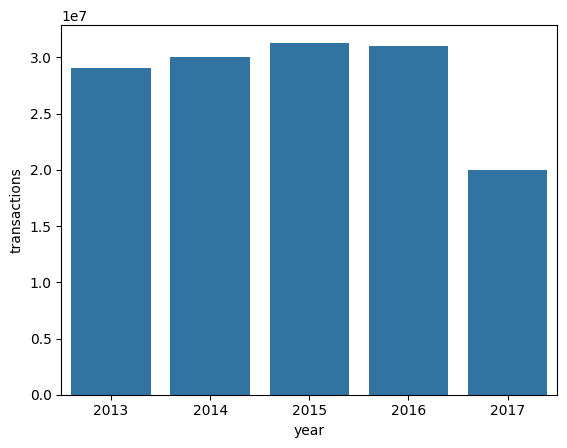

In [59]:
transaction_counts = transactions.groupby('year')['transactions'].sum().to_frame()
sns.barplot(data = transaction_counts,x = 'year',y = "transactions")

In [60]:
transactions[transactions['year'] == "2017"]

,date,store_nbr,transactions,year
71391,2017-01-01,25,1642,2017
71392,2017-01-02,1,516,2017
71393,2017-01-02,2,2083,2017
71394,2017-01-02,3,3918,2017
71395,2017-01-02,4,1682,2017
...,...,...,...,...
83483,2017-08-15,50,2804,2017
83484,2017-08-15,51,1573,2017
83485,2017-08-15,52,2255,2017
83486,2017-08-15,53,932,2017


transactions in 2017 were low because we only have data until august 15th.

Monthly transactions in each year.

In [61]:
transactions['date'].dtype

dtype('<M8[ns]')

In [62]:
transactions['month'] = transactions['date'].dt.strftime('%b').str.lower()

In [63]:
transactions.head()

,date,store_nbr,transactions,year,month
0,2013-01-01,25,770,2013,jan
1,2013-01-02,1,2111,2013,jan
2,2013-01-02,2,2358,2013,jan
3,2013-01-02,3,3487,2013,jan
4,2013-01-02,4,1922,2013,jan


In [64]:
transactions[transactions['month'] == 'aug'].groupby(['year'])['transactions'].sum()

year
2013    2461139
2014    2537572
2015    2675057
2016    2536111
2017    1335692
Name: transactions, dtype: int64

<Axes: xlabel='month', ylabel='transactions'>

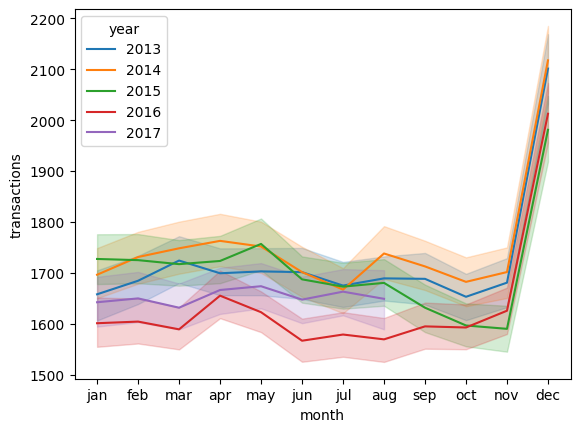

In [65]:
sns.lineplot(data = transactions,x = 'month',y='transactions',hue='year')

C:\Users\User4yy3\AppData\Local\Temp\ipykernel_10180\3229794785.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  each_year = each_year.groupby('month')['transactions'].count().reset_index()
C:\Users\User4yy3\AppData\Local\Temp\ipykernel_10180\3229794785.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  each_year = each_year.groupby('month')['transactions'].count().reset_index()
C:\Users\User4yy3\AppData\Local\Temp\ipykernel_10180\3229794785.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current b

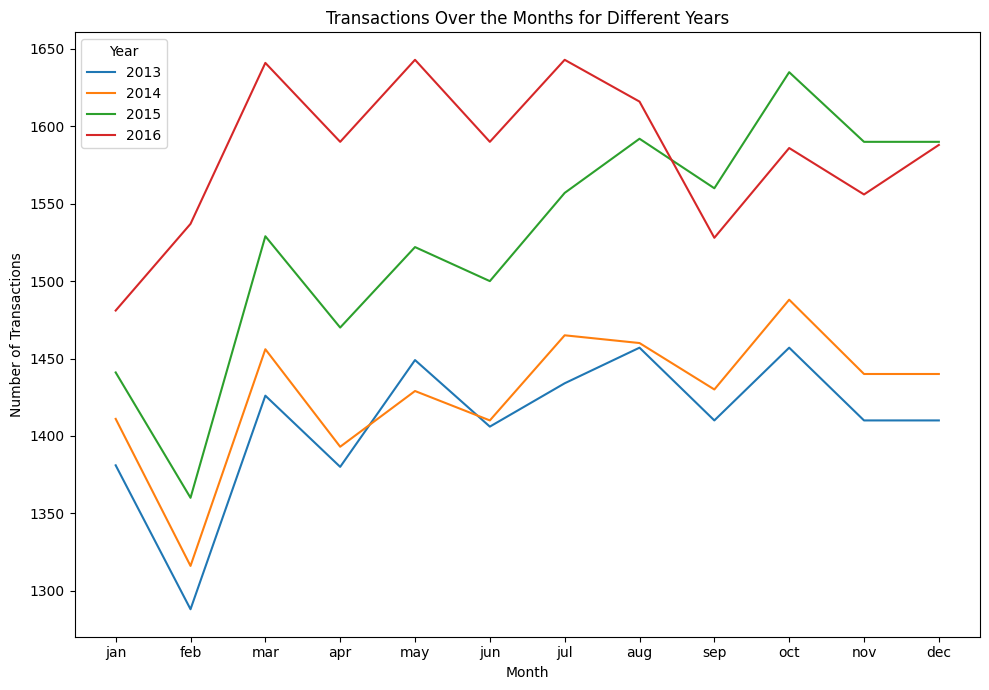

In [66]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
transactions['month'] = pd.Categorical(transactions['month'], categories=month_order, ordered=True)

years = list(transactions['year'].unique())
years.remove("2017")

plt.figure(figsize=(10, 7))

for year in years:
    each_year = transactions[transactions['year'] == year]
    each_year = each_year.groupby('month')['transactions'].count().reset_index()
    sns.lineplot(data=each_year, x='month', y='transactions', label=year)

plt.title('Transactions Over the Months for Different Years')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Year')
plt.tight_layout()

# Show the plot
plt.show()


Trying the hypothesis:

as we know that ecuador is a oil dependent company the sales might affect due the oil prices. so lets try to get some insights.
if the oil prices decreases the sales will decrease.

Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.


we can check sales for each year in each month before 15th of and after 15th 

we can check at the start of every month.

In [67]:
train['day'] = train['date'].dt.day

In [68]:
train[train['year'] == 2013][train['month'] == 'jan'][train['day'] < 15]['sales'].sum() > train[train['year'] == 2013][train['month'] == 'jan'][train['day'] >= 15]['sales'].sum()

C:\Users\User4yy3\AppData\Local\Temp\ipykernel_10180\3538515584.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train['year'] == 2013][train['month'] == 'jan'][train['day'] < 15]['sales'].sum() > train[train['year'] == 2013][train['month'] == 'jan'][train['day'] >= 15]['sales'].sum()
C:\Users\User4yy3\AppData\Local\Temp\ipykernel_10180\3538515584.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train['year'] == 2013][train['month'] == 'jan'][train['day'] < 15]['sales'].sum() > train[train['year'] == 2013][train['month'] == 'jan'][train['day'] >= 15]['sales'].sum()
C:\Users\User4yy3\AppData\Local\Temp\ipykernel_10180\3538515584.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train['year'] == 2013][train['month'] == 'jan'][train['day'] < 15]['sales'].sum() > train[train['year'] == 2013][train['month'] == 'jan'][train['day'] >= 15]['sales'].sum()
C:\Users\User4yy3\A

np.False_

In [69]:
years = list(train['year'].unique())
months = list(train['month'].unique())
result = []
for i in years:
    for j in months:
        answer = train[train['year'] == i][train['month'] == j][train['day'] < 15]['sales'].sum() > train[train['year'] == i][train['month'] == j][train['day'] >= 15]['sales'].sum()
        result.append((i,j,answer))
result

C:\Users\User4yy3\AppData\Local\Temp\ipykernel_10180\1483441756.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  answer = train[train['year'] == i][train['month'] == j][train['day'] < 15]['sales'].sum() > train[train['year'] == i][train['month'] == j][train['day'] >= 15]['sales'].sum()
C:\Users\User4yy3\AppData\Local\Temp\ipykernel_10180\1483441756.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  answer = train[train['year'] == i][train['month'] == j][train['day'] < 15]['sales'].sum() > train[train['year'] == i][train['month'] == j][train['day'] >= 15]['sales'].sum()
C:\Users\User4yy3\AppData\Local\Temp\ipykernel_10180\1483441756.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  answer = train[train['year'] == i][train['month'] == j][train['day'] < 15]['sales'].sum() > train[train['year'] == i][train['month'] == j][train['day'] >= 15]['sales'].sum()
C:\Users\User4yy3\AppData\Local\Te

[(np.int32(2013), 'jan', np.False_),
 (np.int32(2013), 'feb', np.True_),
 (np.int32(2013), 'mar', np.False_),
 (np.int32(2013), 'apr', np.False_),
 (np.int32(2013), 'may', np.False_),
 (np.int32(2013), 'jun', np.False_),
 (np.int32(2013), 'jul', np.False_),
 (np.int32(2013), 'aug', np.False_),
 (np.int32(2013), 'sep', np.False_),
 (np.int32(2013), 'oct', np.False_),
 (np.int32(2013), 'nov', np.False_),
 (np.int32(2013), 'dec', np.False_),
 (np.int32(2014), 'jan', np.False_),
 (np.int32(2014), 'feb', np.True_),
 (np.int32(2014), 'mar', np.False_),
 (np.int32(2014), 'apr', np.False_),
 (np.int32(2014), 'may', np.False_),
 (np.int32(2014), 'jun', np.False_),
 (np.int32(2014), 'jul', np.False_),
 (np.int32(2014), 'aug', np.False_),
 (np.int32(2014), 'sep', np.False_),
 (np.int32(2014), 'oct', np.False_),
 (np.int32(2014), 'nov', np.False_),
 (np.int32(2014), 'dec', np.False_),
 (np.int32(2015), 'jan', np.False_),
 (np.int32(2015), 'feb', np.True_),
 (np.int32(2015), 'mar', np.False_),
 (np

In [70]:
wages_test = pd.DataFrame(result)
wages_test.rename(columns={0: "year", 1: "month", 2: "answer"}, inplace=True)
wages_test[wages_test['answer'] == False].shape[0]

55

In [71]:
wages_test[wages_test['answer'] == True].shape[0]

5

we can see that almost on 55 occations the sales after 15th of each month are more than the other around.

C:\Users\User4yy3\AppData\Local\Temp\ipykernel_10180\1850171691.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_sales = train.groupby(['year', 'month']).apply(
C:\Users\User4yy3\AppData\Local\Temp\ipykernel_10180\1850171691.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_sales = train.groupby(['year', 'month']).apply(


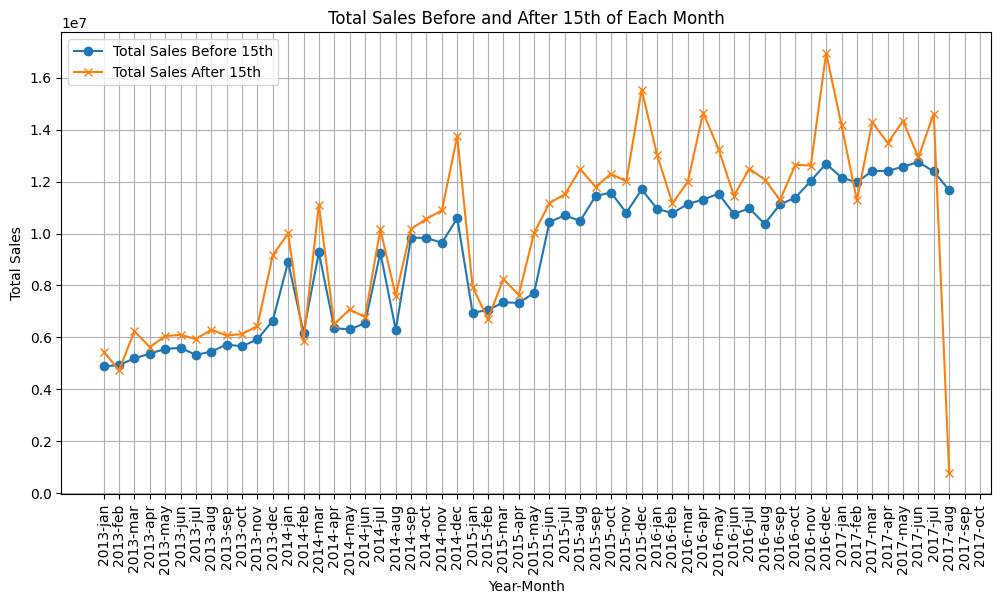

In [72]:
total_sales = train.groupby(['year', 'month']).apply(
    lambda df: pd.Series({
        'total_sales_before_15th': df[df['day'] < 15]['sales'].sum(),
        'total_sales_after_15th': df[df['day'] >= 15]['sales'].sum()
    })
).reset_index()


total_sales['month'] = total_sales['month'].astype(str)

total_sales['year_month'] = total_sales['year'].astype(str) + '-' + total_sales['month']

plt.figure(figsize=(12, 6))

plt.plot(total_sales['year_month'], total_sales['total_sales_before_15th'], marker='o', label='Total Sales Before 15th')
plt.plot(total_sales['year_month'], total_sales['total_sales_after_15th'], marker='x', label='Total Sales After 15th')

plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Before and After 15th of Each Month')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()


# Merging Train and stores

In [79]:
train_store = train.merge(stores,how='left',on='store_nbr')

In [80]:
datadefination(train_store)

,column name,count,mean,std,min,25%,50%,75%,max,missing value count,null percentage,unique,top,freq
0,id,3000888.0,1500443.5,866281.891642,0.0,750221.75,1500443.5,2250665.25,3000887.0,0,0.0,NaN,NaN,NaN
1,date,3000888,2015-04-24 08:27:04.703088384,NaN,2013-01-01 00:00:00,2014-02-26 18:00:00,2015-04-24 12:00:00,2016-06-19 06:00:00,2017-08-15 00:00:00,0,0.0,NaN,NaN,NaN
2,store_nbr,3000888.0,27.5,15.585787,1.0,14.0,27.5,41.0,54.0,0,0.0,NaN,NaN,NaN
3,sales,3000888.0,357.775749,1101.997721,0.0,0.0,11.0,195.84725,124717.0,0,0.0,NaN,NaN,NaN
4,onpromotion,3000888.0,2.60277,12.218882,0.0,0.0,0.0,0.0,741.0,0,0.0,NaN,NaN,NaN
5,year,3000888.0,2014.837886,1.345518,2013.0,2014.0,2015.0,2016.0,2017.0,0,0.0,NaN,NaN,NaN
6,month,3000888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,12,jan,276210
7,day,3000888.0,15.630048,8.794789,1.0,8.0,16.0,23.0,31.0,0,0.0,NaN,NaN,NaN
8,cluster,3000888.0,8.481481,4.649735,1.0,4.0,8.5,13.0,17.0,0,0.0,NaN,NaN,NaN


In [85]:
train_store['date'].dtype

dtype('<M8[ns]')

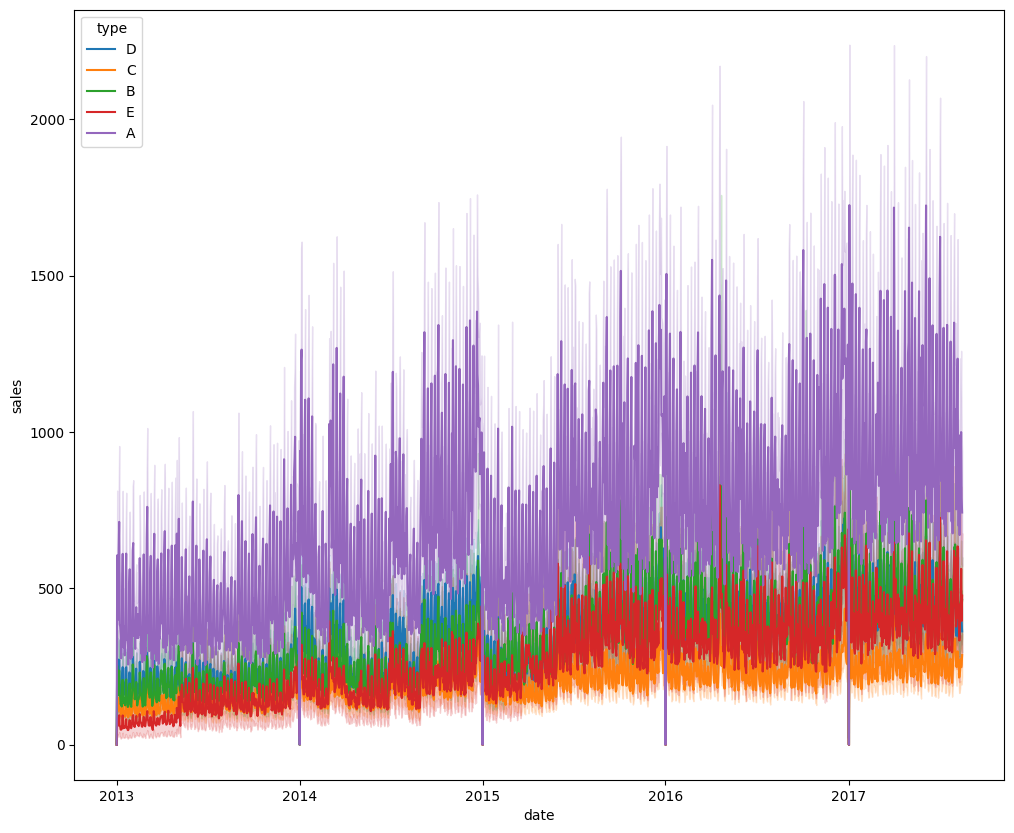

In [87]:
import matplotlib.dates as mdates

train_store['store_nbr'] = train_store['store_nbr'].astype(str)
plt.figure(figsize=(12,10))
sns.lineplot(data = train_store,x = 'date',y='sales',hue='type')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

sales patterns are significantly affected by holidays, with certain holidays leading to increased sales in specific product families.

In [113]:
train['date'] = pd.to_datetime(train['date'])
holidays['date'] = pd.to_datetime(holidays['date'])


train_holidays = train.merge(holidays,on='date',how='left')

In [118]:
train_holidays['type'].unique()
train_holidays['type'].fillna("not holiday",inplace=True)

In [119]:
train_holidays.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
year                 0
month                0
day                  0
type                 0
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dtype: int64

In [122]:
train_holidays

,id,date,store_nbr,family,sales,onpromotion,year,month,day,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,jan,1,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,jan,1,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,jan,1,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,jan,1,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,2013,jan,1,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,2017,aug,15,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,aug,15,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,aug,15,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,aug,15,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [125]:
train_holidays['description'].fillna("not holiday",inplace=True)
train_holidays['transferred'].fillna("False",inplace=True)
train_holidays['locale'].fillna("local",inplace=True)

cities = stores[['store_nbr','city']]
locale_nan_indices = train_holidays[train_holidays['locale_name'].isnull()].index

for i in locale_nan_indices:
    store_nbr = train_holidays.at[i, 'store_nbr']
    city_name = cities.loc[cities['store_nbr'] == store_nbr, 'city'].values[0]
    train_holidays.at[i, 'locale_name'] = city_name

In [127]:
train_holidays['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [129]:
train_holidays['is_holiday'] = 1

In [134]:
train_holidays.loc[train_holidays['type'] == "not holiday", 'is_holiday'] = 0

In [135]:
train_holidays['is_holiday'].unique()

array([1, 0])

In [149]:
product_holiday_sales = train_holidays.groupby(['family','is_holiday'])['sales'].mean().to_frame().reset_index()

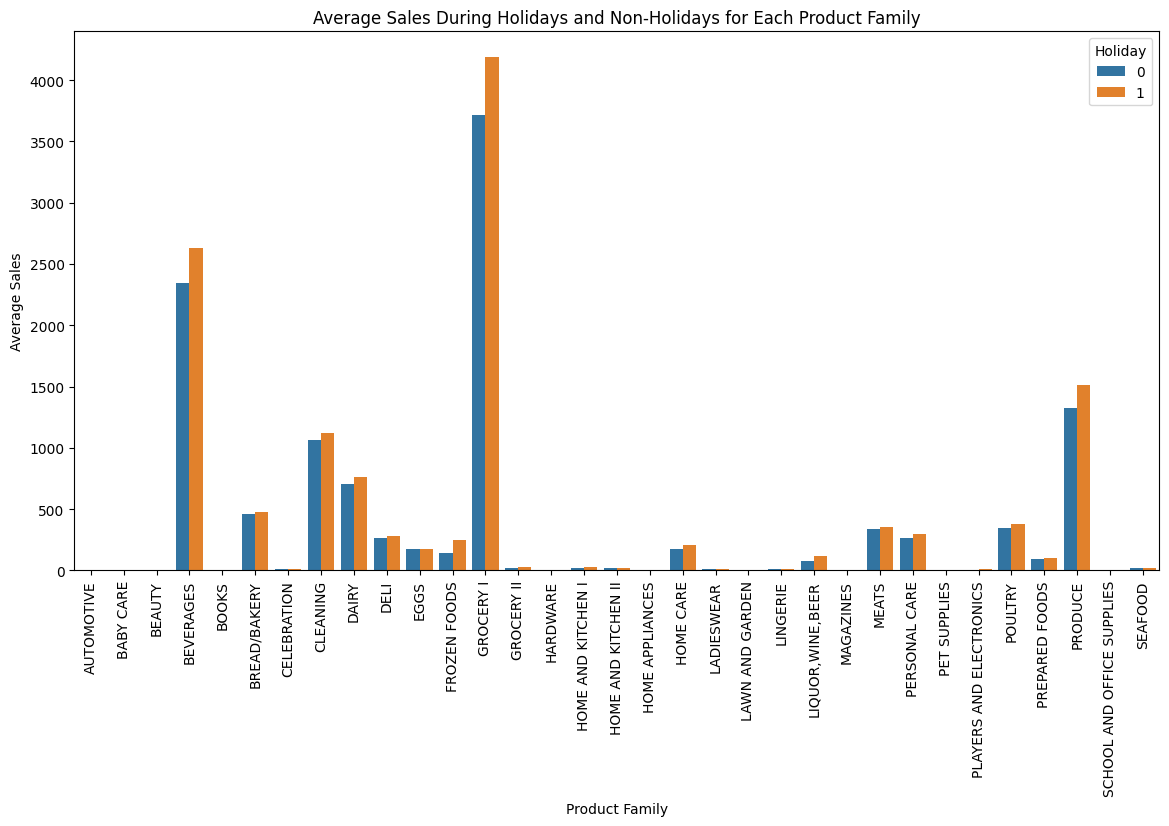

In [150]:
plt.figure(figsize=(14, 7))
sns.barplot(x='family', y='sales', hue='is_holiday', data=product_holiday_sales)
plt.title('Average Sales During Holidays and Non-Holidays for Each Product Family')
plt.xlabel('Product Family')
plt.ylabel('Average Sales')
plt.legend(title='Holiday')
plt.xticks(rotation=90)
plt.show()